# Welcome to the first Beginner Python Workshop 

This notebooks will give you a basic introduction to the Python world. Each topic mentioned below is also covered in the [tutorials and tutorial videos](https://github.com/GuckLab/Python-Workshops/tree/main/tutorials)

Eoghan O'Connell, Guck Division, MPL, 2021

In [1]:
# notebook metadata you can ignore!
info = {"workshop": "02",
        "version" : "0.0.1"}

### How to use this notebook

- Click on a cell (each box is called a cell). Hit "shift+enter", this will run the cell!
- You can run the cells in any order!
- The output of runnable code is printed below the cell.
- Check out this [Jupyter Notebook Tutorial video](https://www.youtube.com/watch?v=HW29067qVWk).

See the help tab above for more information!


# What is in this Workshop?
In this notebook we cover:
- How to open different file formats
   - Image files (.png, .tiff)
   - RTDC files (.rtdc)
   - Excel/Spreadsheet files (.csv file)
- How to install the packages needed to open the above files with `pip`.
- How to look through package documentation.

## How to open different file formats

Image data is different to the data in a word document. Excel data is different again! Therefore we need to have different file formats to store this data. Sometimes these file formats are open-source, such as .hdf5. This means we know how and where the data is stored. In other cases, we don't know the file format layout e.g. private company.

Below we will learn how to open three common file formats in our field:
- Image files (.png, .tiff)
- RTDC files (.rtdc)
- Excel/Spreadsheet files (.csv, .tsv files)

and how to use different Python packages to open each file format.

*If you are not sure how to open a file format, just search for "how do I open (file format) in python?"*

In [2]:
import matplotlib.pyplot as plt

----------------------

### Image files (.png, .tiff)

There are many good packages for opening image files. We will use the `opencv` package.

- To install `opencv`, go to your terminal and run `pip install opencv-python`.

- To import `opencv` and use it when coding, use `import cv2`

In [3]:
# import the `opencv` package
import cv2

In [4]:
# open an example image of an RTDC channel
im = cv2.imread("../data/channel_example.png", cv2.IMREAD_GRAYSCALE)

In [5]:
im

array([[106, 106, 104, ..., 104, 112, 113],
       [102, 109, 106, ..., 111, 113, 109],
       [102, 104, 101, ..., 116, 114, 115],
       ...,
       [107, 110, 102, ..., 117, 118, 115],
       [106, 106, 104, ..., 114, 115, 110],
       [109, 112, 108, ..., 116, 117, 117]], dtype=uint8)

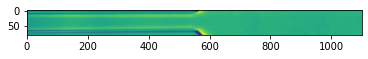

In [6]:
# what does it look like?
# How to I plot it?
plt.figure()
plt.imshow(im)
plt.show()

In [7]:
# but what is this "im"?
type(im)

numpy.ndarray

In [8]:
# how many dimensions is the image?
im.ndim

2

In [9]:
# what shape is it (in pixels)?
im.shape

(80, 1100)

**If you need to use image files, check out this `opencv` tutorial: https://www.geeksforgeeks.org/reading-image-opencv-using-python/**


---------

----------------------

### RTDC files (.rtdc)

Paul Muller has created the .rtdc format in the `dclab` package.

- To install `dclab`, go to your terminal and run `pip install dclab`.

- To import `dclab` and use it when coding, use `import dclab`

In [10]:
# import the `dclab` package
import dclab

In [11]:
# open an example rtdc file
ds = dclab.new_dataset("../data/calibration_beads_47.rtdc")

In [12]:
ds

<RTDC_HDF5 'mm-hdf5_5db1836' at 0x12fd835b250 (C:\Users\eoconne\Documents\Python\repos\Python-Workshops\data\calibration_beads_47.rtdc)>

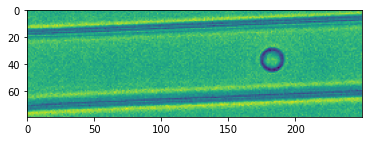

In [13]:
# what does it look like?
# How to I plot it?
plt.figure()
plt.imshow(ds["image"][0])
plt.show()

In [14]:
# but what is this "im"?
type(ds)

dclab.rtdc_dataset.fmt_hdf5.RTDC_HDF5

In [15]:
# what features does it have?
ds.features

['area_cvx',
 'area_msd',
 'area_ratio',
 'area_um',
 'aspect',
 'bright_avg',
 'bright_sd',
 'circ',
 'contour',
 'deform',
 'fl1_area',
 'fl1_max',
 'fl1_pos',
 'fl1_width',
 'fl2_area',
 'fl2_max',
 'fl2_pos',
 'fl2_width',
 'fl3_area',
 'fl3_max',
 'fl3_pos',
 'fl3_width',
 'frame',
 'image',
 'index',
 'inert_ratio_cvx',
 'inert_ratio_prnc',
 'inert_ratio_raw',
 'mask',
 'pos_x',
 'pos_y',
 'size_x',
 'size_y',
 'tilt',
 'time',
 'trace',
 'volume']

In [16]:
# what shape is the image feature?
ds["image"].shape

(47, 80, 250)

**If you need to use RTDC files, check out the `dclab` documentation: https://dclab.readthedocs.io/en/stable/**


---------

----------------------

### Excel/spreadsheet files (.csv, .tsv)

The `pandas` package is very popular way of opening .csv or .tsv files.

- To install `pandas`, go to your terminal and run `pip install pandas`.

- To import `pandas` and use it when coding, use `import pandas as pd`

In [17]:
# import the `pandas` package
import pandas as pd

In [18]:
# open an example .csv file
# data can be found here: https://osf.io/aupb4/#!
df = pd.read_csv("../data/titanic.csv")

In [19]:
df

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0


In [20]:
# how to view the first 10 rows?
df.head(10)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
5,"Anderson, Mr Harry",1st,47.00,male,1
6,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1
7,"Andrews, Mr Thomas, jr",1st,39.00,male,0
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1
9,"Artagaveytia, Mr Ramon",1st,71.00,male,0


In [21]:
# how about the last 8 rows?
df.tail(8)

,Name,PClass,Age,Sex,Survived
1305,"Youssef, Mr Gerios",3rd,NaN,male,0
1306,"Zabour, Miss Hileni",3rd,NaN,female,0
1307,"Zabour, Miss Tamini",3rd,NaN,female,0
1308,"Zakarian, Mr Artun",3rd,27.0,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0
1312,"Zimmerman, Leo",3rd,29.0,male,0


**If you need to use spreadsheets, check out the `pandas` documentation: https://pandas.pydata.org/pandas-docs/stable/**



---------

### Excercises

(hint: use a search engine to look for answers)

1. Open a simple text file (.txt)
2. Open a simple text file using the `with` context manager.

The path to the file is given below.

In [22]:
file_path = "../data/example_text_file.txt"



2. Verify the value of the aspect ratio for the .rtdc file.

Hint: look at the `dclab` documentation to find the definition of aspect ratio!

In [23]:
ds = dclab.new_dataset("../data/calibration_beads_47.rtdc")

# verify the aspect ratio...


3. Apply a Gaussian filter to the image file.

Hint: try to use the `gaussian_filter` function from the `scikit-image` package. You will need to install `scikit-image` first!

In [24]:
im = cv2.imread("../data/channel_example.png", cv2.IMREAD_GRAYSCALE)

# filter the image with a Gaussian
